# Développements limités

Les développements limités permettent d'approcher n'importe quelle fonction au voisinage d'un point régulier. Ils jouents donc un rôle excessivement importants en calcul symbolique comme en analyse numérique.

In [1]:
import math

import matplotlib.pyplot as plt
from matplotlib import colormaps
import pandas as pd
from polynomial import Polynomial
from series import Cosine, Sine

## Série

Une série est une généralisation de la notion de somme. On la note

$$
S_{n} = \sum_{k=1}^{n} u_{k}
$$

On peut faire des séries d'un peu ce que l'on veut : 

 - série de nombre (réels ou complexes), on parle de série numérique
 - série de vecteur, on parle de série vectorielle
 - série de matrice, on parle de série matricielle
 - série de fonction

Dans la suite on étudie les série de fonctions simples (en fait, de polynômes) que sont les développements limités. Ils permettent d'obtenir des approximations efficaces de fonctions compliquées autour de valeurs d'intérêt.

## Convergence des séries de suites

Une série est la généralisation de la notion de somme. Elles servent souvent à trouver des approximations de nombres ou de fonctions importantes que l'on ne saurait pas exprimer par ailleurs.

Par exemple le nombre $\pi$ n'est connu que comme le rapport de l'aire $\mathcal{A}$ et du carré du rayon $r^{2}$ d'un cercle $\pi=\mathcal{A}/r^{2}$. On peut néanmoins calculer ses décimales à l'aide de séries, [par exemple](https://fr.wikipedia.org/wiki/Formule_de_Leibniz#S%C3%A9rie_altern%C3%A9e)

$$
\pi = 4 \sum_{k=0}^\infty\frac{(-1)^k}{2k+1}
$$

In [2]:
def pi_ml(decimal: int = 4):
    """Calculate the pi number using Madhava-Leibniz formula."""
    res = 2/3
    n = 2
    precision = 1
    precision_required = pow(10, -decimal-4)
    while precision > precision_required:
        precision = 1 / (2*n + 1) - 1 / (2*n + 3)
        #print(precision)
        res += precision
        n += 2
    pi_ = 4 * res
    print(f"pi = {pi_:.{decimal}f} after {2*n} steps")
    return pi_

pi_ml(3)
pi_ml(4)
pi_ml(5)
pi_ml(6)

pi = 3.141 after 4476 steps
pi = 3.1415 after 14148 steps
pi = 3.14155 after 44724 steps
pi = 3.141579 after 141424 steps


3.1415785117185613

Malheureusement, cette série ne converge pas rapidement, ce qui en fait un cas d'école sans grand intérêt. On peut lui préférer la formule de [Plouffe, Bailey, Borwein](https://fr.wikipedia.org/wiki/Formule_BBP)

$$
\pi=\sum_{n=0}^\infty \frac{1}{16^n} \left(\frac{4}{8n+1}-\frac{2}{8n+4}-\frac{1}{8n+5}-\frac{1}{8n+6}\right)
$$

In [3]:
def pi(decimal: int=6, verbose: bool=True):
    """PI derivation, using BBP formula."""
    res = 0
    n = 0
    precision = 1
    precision_required = pow(10, -decimal-1)
    while precision > precision_required:
        precision = 4 / (8*n + 1) - 2 / (8*n + 4) - 1 / (8*n + 5) - 1 / (8*n + 6)
        precision /= pow(16, n)
        res += precision
        n += 1
    pi_ = res
    if verbose:
        print(f"pi = {pi_:.{decimal-1}f} after {n} steps")
    return pi_

pi(5)
pi(12)
pi(25)

pi = 3.1416 after 5 steps
pi = 3.14159265359 after 10 steps
pi = 3.141592653589793115997963 after 20 steps


3.141592653589793

On voit bien dans cette série que l'élément de la suite 

$$
u_k = \frac{1}{16^k} \left(\frac{4}{8k+1}-\frac{2}{8k+4}-\frac{1}{8k+5}-\frac{1}{8k+6}\right)
$$

sera au moins $1/16$ fois plus petit que l'élément $u_{k-1}$. Cela permet d'écrire directement la [suite des décimales de $\pi$ en base $16$](https://fr.wikipedia.org/wiki/Formule_BBP#Exploitation_de_la_formule_pour_calculer_les_chiffres_apr%C3%A8s_la_virgule_de_%CF%80). Il suffit alors de transcrire ce chiffre de la base $16$ vers la base $10$ pour retrouver $\pi$ à la décimale voulue.

## Développement de Taylor d'une fonction

Il existe des méthodes puissantes pour développer n'importe quelle fonction au voisinage d'un point donné : les développement en série. Il est en revanche bien évident que l'on ne peut pas développer une fonction à proximité d'un point où la fonction diverge. C'est ce genre de comportement que nous allons étudier maintenant.

## Développement limité

Donnons directement et sans démonstration, la formule du développement limité de Taylor, (ou [développement en série de Taylor](https://fr.wikipedia.org/wiki/S%C3%A9rie_de_Taylor))

$$
\begin{align}
f\left(x-a\right)&=f\left(a\right)+\frac{\left(x-a\right)}{1!}\left.\frac{df}{dx}\right|_{x=a}+\frac{\left(x-a\right)^{2}}{2!}\left.\frac{d^{2}f}{dx^{2}}\right|_{x=a}+\frac{\left(x-a\right)^{3}}{3!}\left.\frac{d^{3}f}{dx^{3}}\right|_{x=a}+\cdots\\&=\sum_{n=0}^{\infty}\frac{\left(x-a\right)^{n}}{n!}\left.\frac{d^{n}f}{dx^{n}}\right|_{x=a}
\end{align}
$$

qui permet d'approximer n'importe quelle fonction autour d'un point donné. En principe, cela n'est valable qu'au voisinage d'un point : notion de rayon de convergence des séries, cf. [Wikipédia:Série de Taylor](https://fr.wikipedia.org/wiki/S%C3%A9rie_de_Taylor).

Pour un polynôme la série est exacte car elle est nécéssairement tronquée à un certain ordre, qui est le degrès du polynôme.

### Fonction exponentielle

Le développement limité de la fonction exponentielle s'écrit

$$
e^{x} = \sum_{k=0}^{\infty} \frac{x^{k}}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots \;,\; \forall x \leq 1
$$

Cette fonction converge très vite, puisque les factorielles sont rapidement très grandes. Cela permet entre autre de calculer la [constante d'Euler](https://fr.wikipedia.org/wiki/E_(nombre)) très facilement. 

In [4]:
factorial, k, EulerE = 1, 1, 1
while k < 20:
    factorial *= k
    EulerE += 1/factorial
    k += 1

EulerE

2.7182818284590455

### Mécanisme de convergence des séries et précision numérique

En revanche, la série ne converge que pour les valeurs de $x$ plus petite que $1$. Regardons comment se comporte la série de Taylor de la fonction exponentielle pour trois valeurs de $s$ proche de $1$, plus petite, égale et plus grande.

In [5]:
factorial, k = 1, 1
em, e, ep = 0.9, 1, 1.1 
ems, es, eps, iterations = [1], [1], [1], [1]
while k < 15:
    factorial *= k
    em *= em
    ep *= ep
    ems.append(ems[-1] + em/factorial)
    es.append(es[-1] + 1/factorial)
    eps.append(eps[-1] + ep/factorial)
    k += 1
    iterations.append(k)
df = {'itération': iterations, 'Exp(0.9)': ems, 'Exp(1)': es, 'Exp(1.1)': eps}
df = pd.DataFrame(df)
df

itération  Exp(0.9)    Exp(1)       Exp(1.1)
0           1  1.000000  1.000000   1.000000e+00
1           2  1.810000  2.000000   2.210000e+00
2           3  2.138050  2.500000   2.942050e+00
3           4  2.209795  2.666667   3.299315e+00
4           5  2.217515  2.708333   3.490772e+00
5           6  2.217802  2.716667   3.666720e+00
6           7  2.217803  2.718056   4.285875e+00
7           8  2.217803  2.718254   4.371645e+01
8           9  2.217803  2.718279   9.795492e+05
9          10  2.217803  2.718282   4.298251e+15
10         11  2.217803  2.718282   6.704194e+35
11         12  2.217803  2.718282   1.482735e+77
12         13  2.217803  2.718282  7.313099e+160
13         14  2.217803  2.718282            inf
14         15  2.217803  2.718282            inf

On voit que les séries convergent rapidement pour les arguments plus petits ou égaux à $1$, tandis que la série `Exp(1.1)` diverge rapidement ; un résultat peu surprenant puisque la puissance domine largement la factorielle dans le rapport $x^k/k!$ de la série $e^ x$. On a voulu ici illustrer la rapidité de convergence, et le mécanisme sous-jacent : On voit que les digits convergent les uns après les autres très rapidement : dès la deuxième itération le chiffre `2.` est correct dans le calcul de `Exp(1)` (qui est la constante d'Euler), dès l'itération 4 on a déjà atteint la précision à un chiffre après la virgule, `2.7`, puis on gagne un chiffre (au moins) de précision à chaque nouvelle itération. Cela vient clairement du fait que le terme d'ordre $k+1$ est au mieux $1/(k+1)$ plus petit que son prédécesseur, du fait de la factorielle dans la série. Or très vite, ce rapport fait que l'on ne mettra pas à jour des digits d'une précision moindre en rajoutant des termes.

### Rayon de convergence des séries

On dit que le rayon de convergence de la série exponentielle est de $1$. Dans la pratique, pour obtenir les valeurs de l'exponentielle de nombre $x > 1$, il suffit de soustraire la partie entière, de calculer la puissance de $e$ de cet entier, et de calculer la série avec le reste de cette soustraction, puisque $e^{x_0 + x_1} = e^{x_0}e^{x_1}$ dans laquelle on suppose que $x_1 < 1$. 

### Fonction exponentielle numérique

On peut donc maintenant définir une fonction exponentielle numérique très facilement

In [6]:
def exp(x, precision=0.000001, e=EulerE):
    """Numerial evaluation of the exponential function."""
    power = int(x)
    rest = x - power
    pres, q, factorial, extraexp = 1, 1, 1, 1
    # pres can be negative, so use the square
    while pres*pres > precision*precision:
        pres *= rest
        factorial *= q
        extraexp += pres/factorial
        q += 1
    return e**power * extraexp

exp(25.45), math.exp(25.45)

(112926161045.81548, 112926161045.81517)

dont la précision est plus que suffisante.

Notons pour conclure sur la création des fonction numérique que cette fonction donne sans modification les valeurs négatives d'arguments.

In [7]:
exp(-12.34), math.exp(-12.34)

(4.373268009850428e-06, 4.373268009850434e-06)

## Fonctions trigonométriques

Depuis la fonction exponentielle, on peut calculer les séries des fonctions trigonométriques (circulaires et hyperboliques). Il suffit de se rappeler quelques formules de définition des fonctions trigonométriques.

On définit donc (et on construirait les mêmes algorithmes que précédemment) pour la fonction cosinus

$$
\cos x = \frac{e^{\mathbb{i}x} + e^{-\mathbb{i}x}}{2} = \sum_{k=0}^\infty \frac{(-1)^k}{(2k)!}x^{2k}
$$

et sinus

$$
\sin x = \frac{e^{\mathbb{i}x} - e^{-\mathbb{i}x}}{2\mathbb{i}} = \sum_{k=0}^\infty \frac{(-1)^k}{(2k+1)!}x^{2k+1}
$$

dont les rayons de convergence sont infini. Il est néanmoins préférable de se ramener autour de $0$ par application de quelques formules de trigonométrie.

Voyons pour cela comment évolue l'approximation en fonction du nombre de termes retenus dans le polynôme représentant la fonction cosinus.

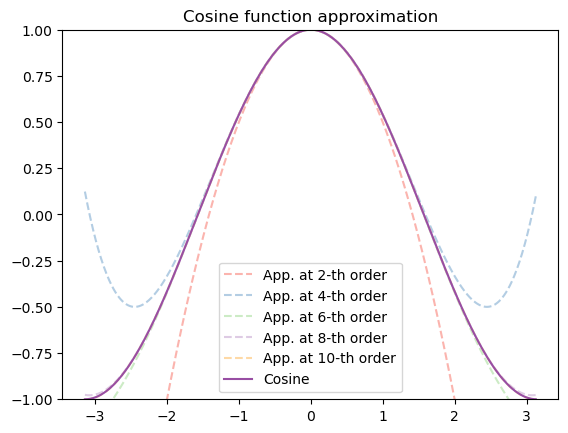

In [8]:
cos = Cosine()
polynoms = [Polynomial(cos.polynom(n)) for n in range(2,11,2)]
Pi = pi(6, verbose=False)

N = 500
t = [-Pi*(1-n/N)+Pi*n/N for n in range(N)]
functions = []
for poly in polynoms:
    y = [poly(t) for t in t]
    functions.append(y)
cosval = [math.cos(t) for t in t]

colors = colormaps['Pastel1']

fig = plt.figure()
for i in range(len(functions)):
    plt.plot(t, functions[i], 
             color=colors(i),
             linestyle='dashed',
             label=f"App. at {2*i+2}-th order")
plt.plot(t, cosval, 
         color=colormaps['Set1'](3),
         label="Cosine")
plt.ylim([-1,1])
plt.title(f"Cosine function approximation")
plt.legend()
plt.show()

On voit que pour $x\in\left[-\pi/2, \pi/2\right]$, la série tronquée au 8-ième ordre semble très précise. Cette série s'écrit : 

$$
\cos x \approx 1 - \frac{x^2}{2} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!}
$$

Autour du point $\pi$, on préfèrera déplacer l'origine en utilisant la formule $\cos\left(x-\pi\right)=\cos x\cos\pi+\sin x\sin\pi=-\cos x$. Il suffit alors de trouver dans quel intervale on veut évaluer ce polynôme. 

On obtient ainsi la méthode de construction suivante pour la fonction cosinus.

In [9]:
Pi = pi(6, verbose=False)

def polycos(x):
    """Evaluate the series giving cosine function at point x."""
    res, numer, q, denom = 1, 1, 1, 1
    # truncation at 8-th order of the cosine series
    while q < 5:
        numer *= x*x
        denom *= 2*q*(2*q-1)
        res += (-1 if q%2 else 1) * numer / denom
        q += 1
    return res

def cos(x):
    """Numerical evaluation of the cosine function."""
    n = 0
    # cos(x) = cos(-x)
    x = x if x >= 0 else -x
    # reajust to the [0, 2Pi] interval
    while x >= 2*Pi:
        x -= 2*Pi
    # calculate the cosine function
    if Pi/2 <= x < 3*Pi/2:
        return polycos(x)
    return -polycos(x)

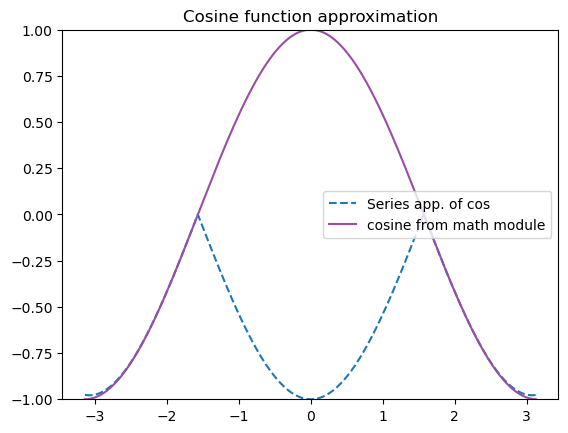

In [10]:
fig = plt.figure()
plt.plot(t, [cos(t) for t in t],
         linestyle='dashed',
         label=f"Series app. of cos")
plt.plot(t, cosval, 
         color=colormaps['Set1'](3),
         label="cosine from math module")
plt.ylim([-1,1])
plt.title(f"Cosine function approximation")
plt.legend()
plt.show()

La fonction tangente est définie par le quotient des deux précédentes séries. On peut soit calculer le quotient des polynômes générés par les séries de cosinus et sinus, soit utiliser la [définition utilisant les nombres de Bernouilli](https://fr.wikipedia.org/wiki/Fonction_trigonom%C3%A9trique#D%C3%A9finitions_%C3%A0_partir_des_s%C3%A9ries_enti%C3%A8res), qu'il faut alors [calculer par récurrence](https://fr.wikipedia.org/wiki/Nombre_de_Bernoulli#Calcul_des_nombres_de_Bernoulli_par_r%C3%A9currence).

## Fonctions hyperboliques

Les fonctions hyperboliques se déduisent des fonctions trigonométriques par [passage au plan comlpexe](https://fr.wikipedia.org/wiki/Fonction_hyperbolique#Relations_entre_fonctions_hyperboliques_et_fonctions_circulaires). On obtient alors la série de la fonction cosinus hyperbolique

$$
\cosh x = \frac{e^{x} + e^{-x}}{2} = \sum_{k=0}^\infty \frac{x^{2k}}{(2k)!}
$$

et sinus hyperbolique

$$
\sinh x = \frac{e^{x} - e^{-x}}{2} = \sum_{k=0}^\infty \frac{x^{2k+1}}{(2k+1)!}
$$

tandis que la [tangente hyperbolique](https://fr.wikipedia.org/wiki/Tangente_hyperbolique#D%C3%A9veloppement_en_s%C3%A9rie_de_Taylor) se déduit des précédentes par division (au sens des polynômes) de leurs séries.

## Fonction logarithme

La fonction logarithme peut s'évaluer à l'aide de la [série de Mercator](https://en.wikipedia.org/wiki/Mercator_series)

$$
\ln\left(1+x\right) = \sum_{k=1}^{\infty}\left(-1\right)^{k+1}\frac{x^k}{k} = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots
$$

qui ne converge que pour $-1 < x \le 1$, et ne converge pas très rapidement puisqu'il n'y a pas ici de factorielle. Néanmoins, cette série permet d'évaluer numériquement la fonction logarithme avec une précision suffisante. On utilise le fait que $\ln e^k x = k + \ln x$ pour se restreindre à l'évaluation de la série dans son rayon de convergence.

In [11]:
def ln(x, precision=0.0000001, e=EulerE):
    """Evaluate the natural logarithm of a number."""
    # transform ln x into k + ln(1+x') via division by E^k
    if x < 0:
        raise ValueError("can't take negative argument")
    rest, k = x, 0
    while rest > 2:
        rest /= e
        k += 1
    # evaluate ln(1+x') via Mercator series
    pres, q, lnx = 1, 1, 0
    # series is for ln(1+x)
    rest -= 1
    # pres can be negative, so use the square
    while pres*pres >= precision*precision:
        pres *= rest
        # alternative series
        lnx += (pres if q%2 else -pres)/q
        q += 1
    return k + lnx

x = 1234876454654.56987
ln(x), math.log(x)

(27.841992044800623, 27.841992044287537)

Connaître une bonne approximation de la fonction logarithme permet de calculer les puissances de n'importe quel chiffre, élevé à n'importe quelle puissance, même les puissances non-entières, puisque l'on a $y=x^\alpha \Rightarrow \ln y = \alpha \ln x$ et donc $y=e^{\alpha \ln x}$

In [12]:
def power(x, alpha):
    if alpha < 0:
        return power(1/x, alpha)
    return exp(alpha*ln(x))

power(25.45, 45.23), math.pow(25.45, 45.23)

(3.795409163157159e+63, 3.7954090709048756e+63)

qui a une précision remarquable, malgrès la faiblesse de convergence de la fonction logarithmique.

In [13]:
power(567, 0.5), math.sqrt(567)

(23.8117617834886, 23.811761799581316)

Notons que l'on compare notre algorithme de calcul avec l'algorithme de calcul du module [math](https://docs.python.org/3/library/math.html) de la librairie standard. or, celui-ci utilise également la notion de convergence des séries pour évaluer la fonction exponentielle et la fonction logarithme (il n'y a pas de meilleure façon de faire... mais d'autres séries peuvent être meilleures que d'autres).

## Voir aussi

Les [approximants de Padé](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant) sont une sorte de généralisation des développement limité, qui offrent d'autres avantages pour certains calculs numériques des fonctions.